In [1]:
import pickle
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
from collections import defaultdict
import matplotlib

## Four nice histograms

In [2]:
#the folders where the run output was stored, ordered accordng to
#"Phil. 10 districts", "Chi. 10 districts", "Phil. 50 districts", "Chi. 50 districts"
folders = ["Ph10", "Ch10", "Ph50", "Ch50"] 

In [3]:
labels = ["Phil_10", "Chi_10", "Ph_50", "Chi_50", ]
titles = ["Phil. 10 districts", "Chi. 10 districts", "Phil. 50 districts", "Chi. 50 districts"]
dems = ["HISP", "BPOP"]
city_list = [
    "Philadelphia", "Chicago"   
]
scale_list = [
    "10 districts",
    "50 districts"
]

In [4]:
run_data = [
    pickle.load(open("{}/run_data.p".format(f), "rb")) for f in folders
]

In [5]:
counter = 0
data = defaultdict(dict)
for s in scale_list:
    for c in city_list:
        data[s][c] = run_data[counter]
        counter+=1

Phil. 10 districts HISP
10
Phil. 10 districts BPOP
10
Chi. 10 districts HISP
10
Chi. 10 districts BPOP
10
Phil. 50 districts HISP
50
Phil. 50 districts BPOP
50
Chi. 50 districts HISP
50
Chi. 50 districts BPOP
50


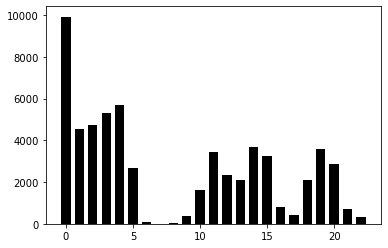

In [8]:
#collect histogram data

hists = defaultdict(list)
for j, (l, (t, d)) in enumerate(zip(labels, zip(titles, run_data))):
    for i, r in enumerate(dems):
        print(t,r)
        s = [
            len([x for x, y in zip(v,totv) if x>0.5*y]) for v,totv in zip(d[i], d[-1])
        ]
        X = plt.hist(
            s,
            bins = [x-0.5 for x in range(min(s), max(s)+2)],
            color='black',
            align='mid',
            rwidth=0.7
        )
        print(int(j/2)*40+10)
        hists[r].append(
            (
                [x/10000 for x in X[0]],
                [(x+0.5)/(int(j/2)*40+10) for x in X[1][:-1]]
            )
        )
    

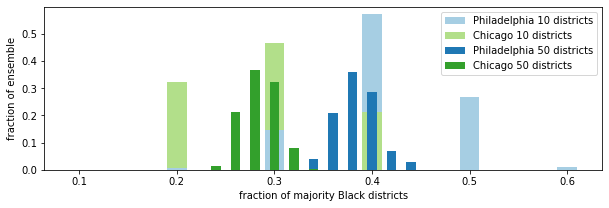

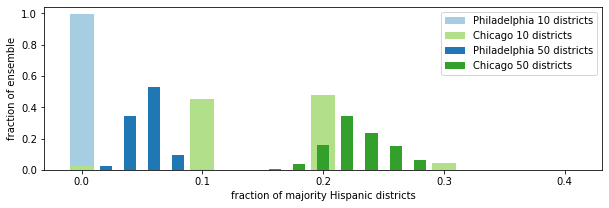

In [75]:
# make nice histograms
labellist = [
    "Philadelphia 10 districts",
    "Chicago 10 districts",
    "Philadelphia 50 districts",
    "Chicago 50 districts",
]
alphas = [0.2,0.2,1,1]
widths = [0.02, 0.02, 0.01, 0.01]
clist = [
    (166,206,227),
    (178,223,138),
    (31,120,180),
    (51,160,44)
]
#clist = ['blue', 'orange', 'blue', 'orange']
for R, r in zip(["Black", "Hispanic"],["BPOP", "HISP"]):
    fig, ax = plt.subplots(figsize=(10,3))
    for i, (Y, X) in enumerate(hists[r]):
        plt.bar(
            X, 
            Y,
            width=widths[i],
            label=labellist[i],
            color = [x/255 for x in clist[i]]
        )
        #HACK TO MAKE SURE ALL BARS SHOW UP
        if (i==1):
            plt.bar(
                [x for x in hists[r][0][1] if 0.05 < x < 0.35], 
                [y for y, x in zip(hists[r][0][0], hists[r][0][1]) if 0.05 < x < 0.35],
                width=widths[0],
                color = [x/255 for x in clist[0]]
            )
    plt.legend()
    plt.ylabel("fraction of ensemble")
    plt.xlabel("fraction of majority {} districts".format(R))
    plt.savefig("hists/combined_{}".format(R), dpi=150, bbox_inches='tight')
    plt.show()
        